In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble



In [2]:

df = pd.read_csv('./work/viikko11/datasets/iris.csv')

# make X and y
X = df.iloc[:, 0:4]
y = df.loc[:, ['Species']]

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [3]:

# train RandomForestClassifier
model = ensemble.RandomForestClassifier(max_depth=6)
model.fit(X,y)

# Predicting the Test set results
y_pred = model.predict(X_test)


/opt/conda/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


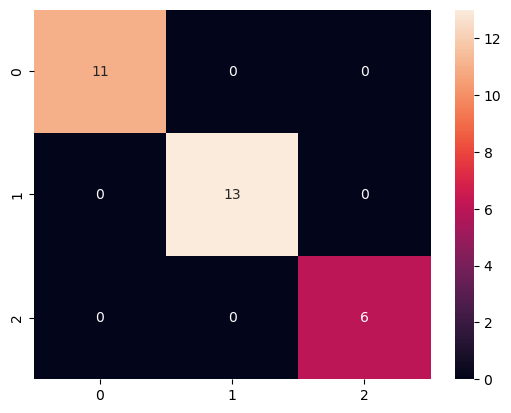

RF acc score: 1.00 


In [4]:
# make confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

# Calculate accuracy score
acc = accuracy_score(y_test, y_pred)
print (f'RF acc score: {acc:.2f} ')


In [5]:

# make three test flowers
new_flowers = [{'sepal length (cm)':5, 'sepal width (cm)':3.4, 'petal length (cm)':1.5, 'petal width (cm)':0.3},
               {'sepal length (cm)':6.5, 'sepal width (cm)':3, 'petal length (cm)':5.5, 'petal width (cm)':2.3},
               {'sepal length (cm)':5, 'sepal width (cm)':2.4, 'petal length (cm)':4, 'petal width (cm)':1.74}]
new_data = pd.DataFrame(new_flowers)

# predict with new data and create dataframe
new_y = pd.DataFrame(model.predict(new_data))

# apply species information based on the prediction
new_y[1] = new_y[0].apply(lambda x: 'setosa' if x == 0  else ('versicolor' if x == 1 else 'virginica'))



